In [2]:
pip install wordcloud -i https://pypi.tuna.tsinghua.edu.cn/simple

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 365 kB 1.4 kB/s eta 0:00:05
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


## 1.导包

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud

## 2.读取数据

In [200]:
#数据来自蚂蚁花呗客服对话
df=pd.read_csv('Market_Basket/Market_Basket_Optimisation.csv', sep='\t', header=None,names=['goods'])
# df=df.dropna()
content=df.goods.values.tolist()
# content

## 3.数据处理

In [201]:
content = [i.replace(" & ","_") for i in content]
content = [i.replace(" ","_") for i in content]
content = ",".join(content)
# content

## 4.可视化呈现前10大词云

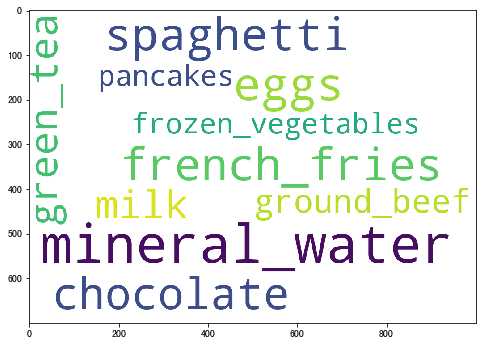

In [218]:
wc = WordCloud(max_words=10,width=1000,height=700,background_color='white',collocations=False)
# 调用词云对象的generate方法，将文本传入
wc.generate(content)

# 将生成的词云保存为output1.png图片文件，保存出到当前文件夹中
# wc.to_file('output1.png')
plt.figure(figsize=(8,6))
plt.imshow(wc)
plt.show()

## 5.先统计出top10，再呈现可视化结果

In [219]:
## 统计词频：方法太古老，舍弃
# conten_temp = content.split(",")
# conten_temp
# result={}
# for i in set(conten_temp):
#     result[i]=conten_temp.count(i)
# print(result)

In [220]:
# 统计词频
result = wc.process_text(content)

In [221]:
# 找出前10大频率最高大词
result_10 = sorted(result.items(), key=lambda x:x[1],reverse=True)[:10]
result_10 = dict(zip([i[0] for i in result_10], [i[1] for i in result_10]))
result_10

{'mineral_water': 1788,
 'eggs': 1348,
 'spaghetti': 1306,
 'french_fries': 1282,
 'chocolate': 1230,
 'green_tea': 991,
 'milk': 972,
 'ground_beef': 737,
 'frozen_vegetables': 715,
 'pancakes': 713}

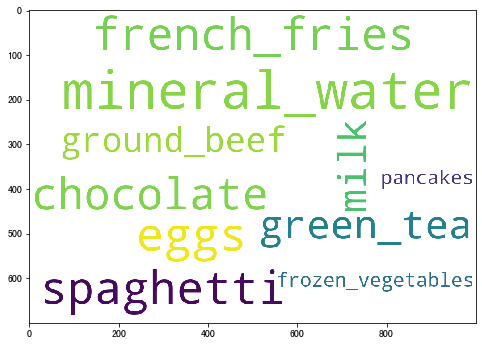

In [222]:
wc.generate_from_frequencies(result_10)
plt.figure(figsize=(8,6))
plt.imshow(w)
plt.show()